# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados
*   Data de entrega: **23/02/2022, até as 09:30h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implementação



# Parte 1

Utilizando o conjunto de dados [`digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) e a implementação do [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) disponível na biblioteca [`scikit-learn`](https://scikit-learn.org/stable/index.html), avalie se o algoritmo tem melhor desempenho com o dados originais, ou com os dados em menor dimensão (8) após transformação via PCA. Utilizem alguma [`métrica de clustering`](https://scikit-learn.org/stable/modules/model_evaluation.html), também disponíveis no `scikit-lean`, como ARI, NMI e/ou Pureza.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt

(1797, 64)


In [2]:
def exibe_digito(dado):
    plt.imshow(dado, cmap=plt.get_cmap('gray_r'))


Explorando o dataset

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Exibindo a descrição

Exibindo as classes alvo e seus quantitativos

Classes distintas: 10


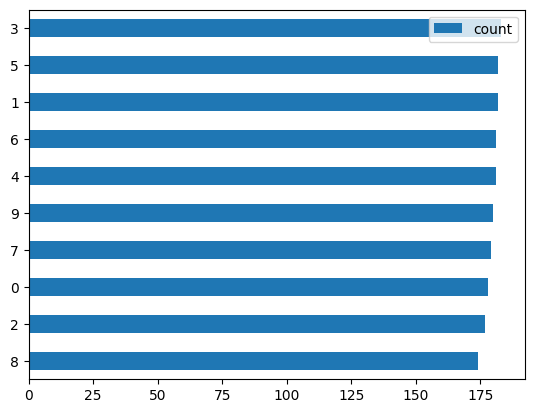

In [4]:
import pandas as pd
counts = pd.Series(digits['target']).value_counts().sort_values().to_frame()
counts.plot.barh()
print(f"Classes distintas: {len(counts)}")

Exibindo o formato das features

In [5]:
digits['data'].shape

(1797, 64)

In [6]:
digits['images'].shape

(1797, 8, 8)

Exibindo uma amostra i

Dado: 
[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
Pixels: 
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
Imagem:
Rótulo 
0


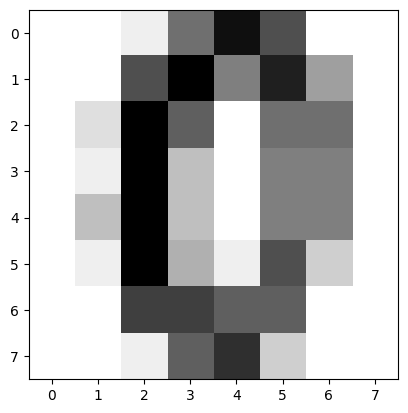

In [7]:
i = 10

print(f"Dado: \n{digits['data'][i]}")
print(f"Pixels: \n{digits['images'][i]}")
print("Imagem:")
exibe_digito(digits['images'][i])
print(f"Rótulo \n{digits['target'][i]}")

Certificando-se dos valores máximo e mínimo

In [8]:
print(digits['data'].min())
print(digits['data'].max())

0.0
16.0


Normalizando os pixels para maior eficiência do modelo

In [9]:
X = digits['data']/16
y = digits['target']
print(X[0])
print(X.min())
print(X.max())

[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.
 0.8125 0.9375 0.625  0.9375 0.3125 0.     0.     0.1875 0.9375 0.125
 0.     0.6875 0.5    0.     0.     0.25   0.75   0.     0.     0.5
 0.5    0.     0.     0.3125 0.5    0.     0.     0.5625 0.5    0.
 0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.     0.     0.125
 0.875  0.3125 0.625  0.75   0.     0.     0.     0.     0.375  0.8125
 0.625  0.     0.     0.    ]
0.0
1.0


Aplicando PCA (Principal Component Analyses) usando 8 componentes

In [10]:
SEED = 42

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8, random_state=SEED)
X_reduzido = pca.fit_transform(X)

Aplicando K-Means sem reduzir e reduzindo a dimensionalidade

In [12]:
from sklearn.cluster import KMeans
from sklearn.base import clone

In [13]:
model = KMeans(n_clusters=10, random_state=SEED)

preds = model.fit_predict(X)
model_pca = clone(model)
preds_pca = model_pca.fit_predict(X_reduzido)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Avaliando os resultados de clusterização

Utilizando a métrica ARI (Adjusted Rand Index)

$A R I=\frac{\sum_{i j}\left(\begin{array}{c}n_{i j} \\ 2\end{array}\right)-\left[\sum_{i}\left(\begin{array}{c}a_{i} \\ 2\end{array}\right) \sum_{j}\left(\begin{array}{c}b_{j} \\ 2\end{array}\right)\right] /\left(\begin{array}{c}n \\ 2\end{array}\right)}{\frac{1}{2}\left[\sum_{i}\left(\begin{array}{c}a_{i} \\ 2\end{array}\right)+\sum_{j}\left(\begin{array}{c}b_{j} \\ 2\end{array}\right)\right]-\left[\sum_{i}\left(\begin{array}{c}a_{i} \\ 2\end{array}\right) \sum_{j}\left(\begin{array}{c}b_{j} \\ 2\end{array}\right)\right] /\left(\begin{array}{c}n \\ 2\end{array}\right)}$

In [14]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
print("X Original")
print(adjusted_mutual_info_score(y, preds))
print(adjusted_mutual_info_score(preds, y))
print("X Reduzido")
print(adjusted_mutual_info_score(y, preds_pca))

X Original
0.7388667853111742
0.738866785311174
X Reduzido
0.7017871779815249


Como ARI é uma medidade simétrica, o resultado é o mesmo independente da ordem dos parâmetros.

Quanto mais essa métrica estiver próxima de 1, mais similares são os clusters.

Utilizando a métrica NMI (Informação Mútua Normalizada)

$NMI(y, \hat{y})=\frac{2 \times I(y ; \hat{y})}{[H(y)+H(\hat{y})]}$

In [15]:
from sklearn.metrics import normalized_mutual_info_score
print("X Original")
print(normalized_mutual_info_score(y, preds))
print("X Reduzido")
print(normalized_mutual_info_score(y, preds_pca))

X Original
0.7414681265635253
X Reduzido
0.704763472731993


As mesmas obsevações do ARI são válidas para o NMI.

Utilizando a Métrica Pureza

$P=\frac{1}{n} \sum_{i}^{k} \max _{j} \sum_{j} 1\left\{\hat{y}_{i}=y_{j}\right\}$

onde N = número de objetos(dados), k = número de clusters, $\hat{y}_{i}$ é um cluster e $y_{j}$ é uma classificação que tem a maior contagem para o cluster $\hat{y}_{i}$

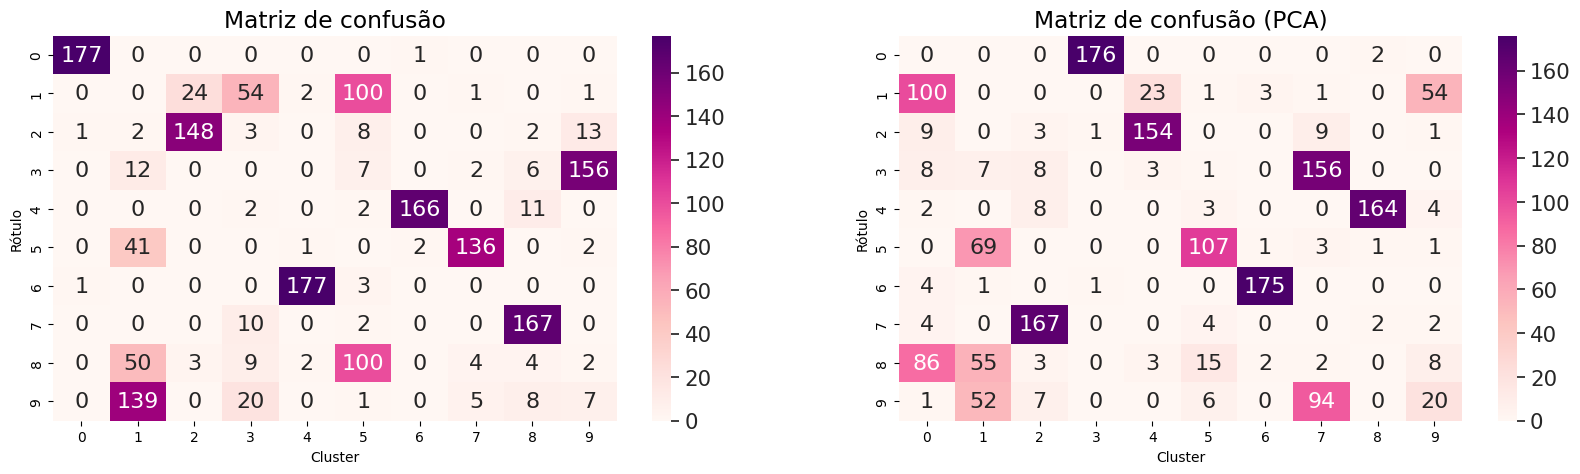

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y, preds)
cm_pca = confusion_matrix(y, preds_pca)
fig, ax = plt.subplots(1,2, figsize = (20,5))
sn.set(font_scale=1.4)
sn.heatmap(cm, ax=ax[0], annot=True, annot_kws={"size": 16}, cmap='RdPu', fmt='g')
ax[0].set(title="Matriz de confusão", xlabel="Cluster", ylabel = "Rótulo")
sn.heatmap(cm_pca, ax=ax[1], annot=True, annot_kws={"size": 16}, cmap='RdPu', fmt='g')
ax[1].set(title="Matriz de confusão (PCA)", xlabel="Cluster", ylabel = "Rótulo")
plt.show()


Obtendo as maiores contagens por cluster

In [17]:
max_counts = cm.max(axis=0)
max_counts_pca = cm_pca.max(axis=0)
print("X Original")
print(max_counts)
print("X Reduzido")
print(max_counts_pca)

X Original
[177 139 148  54 177 100 166 136 167 156]
X Reduzido
[100  69 167 176 154 107 175 156 164  54]


Somando as contagens e dividindo pelo número de objetos (dados) $n$

In [18]:
print("X Original")
print(max_counts.sum()/len(X))
print("X Reduzido")
print(max_counts_pca.sum()/len(X))

X Original
0.7902058987200891
X Reduzido
0.7356705620478575


### Conclusão

Nenhuma das 3 métricas foi melhor ao reduzir a dimensionalidade para esse dataset. Portanto, o K-means tem melhor desempenho com o dataset original.

# Parte 2

**Testar CUDA**

In [19]:
import torch
import numpy as np
import torch.backends.cudnn as cudnn

usar_gpu = torch.cuda.is_available()
if usar_gpu:
  print("CUDA disponível. Processamento em GPU!")
else:
  print("CUDA NÃO disponível. Processamento em CPU!")

CUDA disponível. Processamento em GPU!


**Carregando e Divisão de Dados**

In [20]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data.dataloader import DataLoader

batch_size = 128

# Converte os dados para um FloatTensor
transform = transforms.ToTensor()

# Escolhe os dados de treino e teste
train_data = datasets.MNIST(root="datasets", train=True,
                            download=True, transform=transform)
test_data = datasets.MNIST(root="datasets", train=False,
                            download=True, transform=transform)

# Define o carregamento dos dados utilizado os dados escolhidos

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15884130.64it/s]


Extracting datasets/MNIST/raw/train-images-idx3-ubyte.gz to datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 588371.52it/s]


Extracting datasets/MNIST/raw/train-labels-idx1-ubyte.gz to datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1101614.97it/s]


Extracting datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10708560.30it/s]


Extracting datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/MNIST/raw



In [21]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [22]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [23]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [24]:
test_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Exbindo algumas amostras do datset de treino

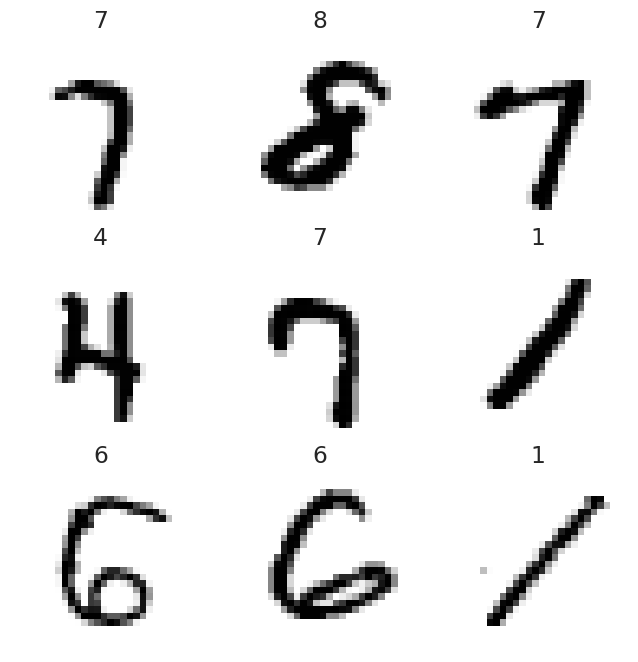

In [25]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray_r")
plt.show()

Descobrindo o formato de cada imagem

Feature batch shape: torch.Size([128, 1, 28, 28])
Labels batch shape: torch.Size([128])


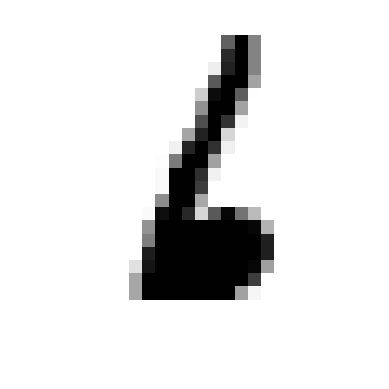

Label: 6


In [26]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.axis('off')
plt.imshow(img, cmap="gray_r")
plt.show()
print(f"Label: {label}")

Como o tamanho do batch = 32 (quantidade de amostras por cada passo nas épocas) = o tamanho da primeira dimensão, temos 1 única camada (imagem na escala de cinza e 28x28 pixels)

Exibindo as classes alvo e seus quantitativos

Classes distintas: 10


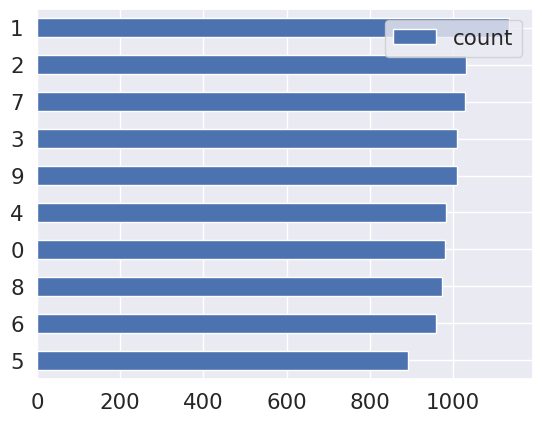

In [27]:
import pandas as pd
counts = pd.Series(test_data.targets).value_counts().sort_values().to_frame()
counts.plot.barh()
print(f"Classes distintas: {len(counts)}")


Agora...
*  Defina e treine um AutoEncoder Convolucional.

Definição do Modelo

In [28]:
from torch.nn import Module, Sequential, Conv2d, ReLU, MaxPool2d, MSELoss, Sigmoid, ConvTranspose2d

In [29]:
class ConvAutoencoder(Module):
  def __init__(self):
    super(ConvAutoencoder, self).__init__()

    # Input é no formato 1 (canal) x 28 x 28 (pixels)
    self.conv1 = Sequential(Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
                            ReLU(True),
                            MaxPool2d(2, 2))

    self.conv2 = Sequential(Conv2d(in_channels=16, out_channels=4, kernel_size=3, padding=1),
                            ReLU(True),
                            MaxPool2d(2, 2))

    self.conv1_transp = Sequential(ConvTranspose2d(in_channels=4, out_channels=16, kernel_size=2, stride=2),
                                   ReLU(True))

    self.conv2_transp = Sequential(ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=2, stride=2),
                                   Sigmoid())

    self.encoder = Sequential(self.conv1,
                              self.conv2)

    self.decoder = Sequential(self.conv1_transp,
                              self.conv2_transp)

  def forward(self, x):
    encoded_x = self.encoder(x)
    decoded = self.decoder(encoded_x)
    return decoded

**Alocação do modelo e device adequado (dependente da disponibilidade GPU)**

In [30]:
# cria o modelo
model_ae = ConvAutoencoder()
print(model_ae)

# joga o modelo para GPU, caso aplicável
if usar_gpu:
  torch.cuda.init()
  model_ae.cuda()
  cudnn.benchmark = True

ConvAutoencoder(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv1_transp): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv2_transp): Sequential(
    (0): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (1): Sigmoid()
  )
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(16, 4, kernel_size=(3, 3)

In [31]:
#!pip install torchsummary

In [32]:
# from torchsummary import summary

# summary(conv_ae, input_size=(1, 28, 28))

**Função de Custo e Otimizador**.

Vide [`torch.optim`](https://pytorch.org/docs/stable/optim.html) e [`torch.nn` Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions). Atentem para todos os parametros necessários.

In [33]:
import torch.optim as optim

# model_ae = ConvAutoencoder()

# especifique a funcao de custo (loss) adequada
criterion = MSELoss()

# especifique o otimizador
optim = optim.Adam(model_ae.parameters(), lr=1e-3)

**Treinamento**

In [34]:
def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.

    for i, (x, y) in enumerate(train_loader):
        if usar_gpu:
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            x, y = x.to(device), y.to(device)

        # TODO: 1. Zere o gradiente de todas as variávels do otimizador
        #          (vide zero_grad do nn.optim)
        optim.zero_grad()

        # TODO: 2. Faça um forward no modelo passando x como entrada
        #          (não deixe de capturar a saída)
        decoded = model_ae(x)

        # TODO: 3. Calcule a loss do batch (utilize o criterion para comparar a
        #          saída do modelo com os targets y)
        loss = criterion(decoded, x)

        # TODO: 4. Compute o gradiente (backward na loss)
        loss.backward()

        # TODO: 5. Realize um passo de otimização (step no optim)
        optim.step()

        # atualização da loss de treinamento

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

In [35]:
# Initializing in a separate cell so we can easily add more epochs to the same run
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 30

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    # Make sure gradient tracking is on, and do a pass over the data
    model_ae.train(True)
    avg_loss = train_one_epoch(epoch_number)
    model_ae.train(False)
    print(f'LOSS train {avg_loss}')
    epoch_number += 1

EPOCH 1:
LOSS train 0.0
EPOCH 2:
LOSS train 0.0
EPOCH 3:
LOSS train 0.0
EPOCH 4:
LOSS train 0.0
EPOCH 5:
LOSS train 0.0
EPOCH 6:
LOSS train 0.0
EPOCH 7:
LOSS train 0.0
EPOCH 8:
LOSS train 0.0
EPOCH 9:
LOSS train 0.0
EPOCH 10:
LOSS train 0.0
EPOCH 11:
LOSS train 0.0
EPOCH 12:
LOSS train 0.0
EPOCH 13:
LOSS train 0.0
EPOCH 14:
LOSS train 0.0
EPOCH 15:
LOSS train 0.0
EPOCH 16:
LOSS train 0.0
EPOCH 17:
LOSS train 0.0
EPOCH 18:
LOSS train 0.0
EPOCH 19:
LOSS train 0.0
EPOCH 20:
LOSS train 0.0
EPOCH 21:
LOSS train 0.0
EPOCH 22:
LOSS train 0.0
EPOCH 23:
LOSS train 0.0
EPOCH 24:
LOSS train 0.0
EPOCH 25:
LOSS train 0.0
EPOCH 26:
LOSS train 0.0
EPOCH 27:
LOSS train 0.0
EPOCH 28:
LOSS train 0.0
EPOCH 29:
LOSS train 0.0
EPOCH 30:
LOSS train 0.0


In [36]:
# dataiter = iter(train_loader)
dataiter = iter(test_loader)

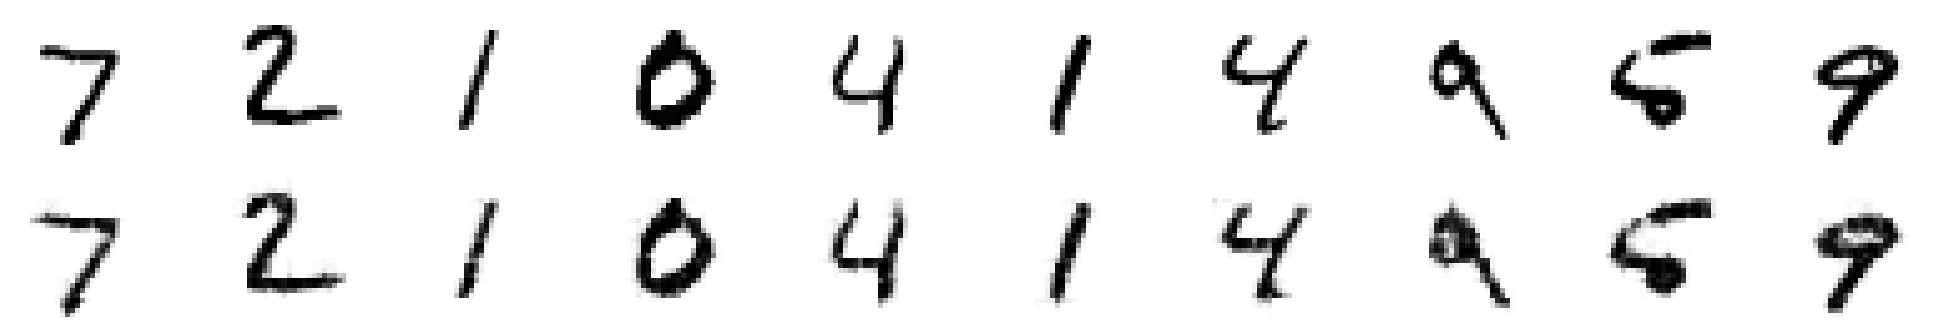

In [38]:
# TODO: 6. plote as 10 primeiras imagens (reconstruídas e decodificadas)
#          do último batch  (usem o matplotlib)
# Imagens rescontruída

x, y = next(dataiter)
if usar_gpu:
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    x, y = x.to(device), y.to(device)

output = model_ae(x) # Obtém amostras

# Plota as 10 primeiras imagens
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
# imagens originais na primeira linha, reconstruídas e decodificadas na segunda linha
for images, row in zip([x, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img.detach().cpu()), cmap='gray_r')
        # plt.savefig(img.cpu(), )
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()